In [1]:
# from src.train.trainer import Trainer
# from src.model.model_factory import build_model
# from src.logger.loggers import build_logger
from src.utils.load_config import load_config 
# from src.utils.dataset_type import DatasetType 
# from src.evalutation.writers import build_writers
# from src.evalutation.evaluators import build_evaluator
from src.utils.misc import set_seed

In [2]:
config_file = './configs/base_config.yaml'
config = load_config(config_file)
set_seed(config.random_seed)

# model = build_model(config.model)
# logger = build_logger(config)
# writers = build_writers(config, config.train.out_path, logger)
# train_evaluator = build_evaluator(config.evaluation.train_metrics, writers, DatasetType.Train)
# valid_evaluator = build_evaluator(config.evaluation.valid_metrics, writers, DatasetType.Valid)

# trainer = Trainer(model, logger, train_evaluator, valid_evaluator, config)

In [47]:
from src.data.datasets import CachedImageDataset
from torch.utils.data import DataLoader, random_split
from torchvision.transforms import v2

cached_transform = v2.Compose([
    v2.ToTensor(),
    v2.Grayscale()
])

online_transform = v2.Compose([
    v2.RandomResizedCrop(size=config.data.crop_size, antialias=True),
    v2.RandomHorizontalFlip(p=0.5),
    v2.RandomRotation(
        (-config.data.rotation_angle, config.data.rotation_angle),
        v2.InterpolationMode.BILINEAR),
    v2.Normalize([0], [1]),
])

dataset = CachedImageDataset(
    root_dir=config.data.path,
    cached_transform=cached_transform,
    online_transform=online_transform
)

train_dataset, valid_dataset, test_dataset = random_split(dataset, [0.7, 0.1, 0.2])

uint8 (641, 921, 3)


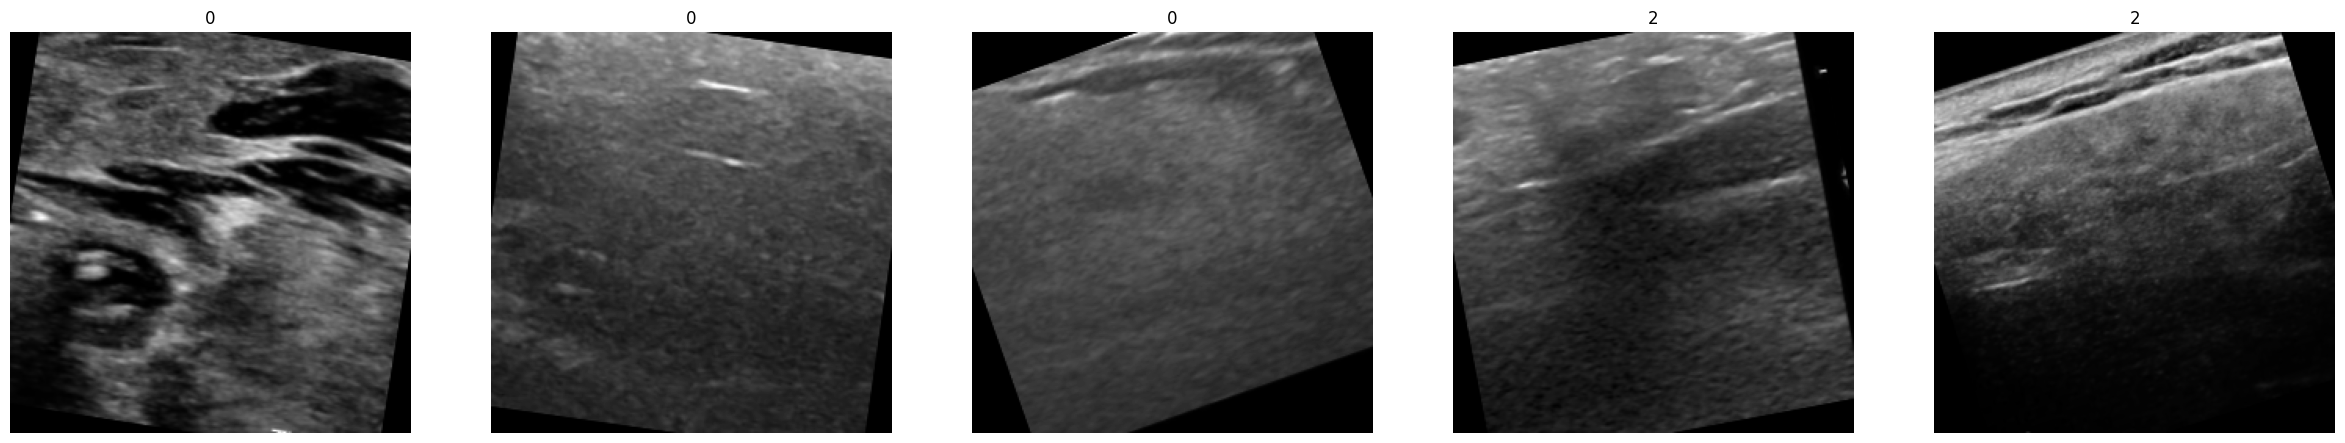

In [51]:
import matplotlib.pyplot as plt
import numpy as np

n = 5

fig, axs = plt.subplots(1, n, figsize=(6*n, 6))

for ax in axs:
    img, label = train_dataset[np.random.randint(len(train_dataset))]
    ax.imshow(img.numpy()[0,:,:], 'gray')
    ax.axis(False)
    ax.set_title(int(label.item()))
plt.show()